# Chapter 25 - Exercises

In [1]:
from statistics import stdev
import scipy.stats as stats
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use("ggplot")

In [2]:
def degrees_freedom(s1, n1, s2, n2):
    """
    Calculate degrees freedom for a two-sample $t$-test under assumptions of unequal variances.
    """
    n = (s1 ** 2 / n1 + s2 ** 2 / n2) ** 2
    d = (1 / (n1 - 1)) * (s1 ** 2 / n1) ** 2 + (1 / (n2 - 1)) * (s2 ** 2 / n2) ** 2
    return n / d

In [3]:
template = """
se: {}
df: {}
t: {}
P-value: {}
"""

## 25.1 

### Answers

* a) randomly assign hens to each of the two groups; apply treatment to one, and nothing (or placebo) to the other, making the second group the control; put a secondary blind (on the researchers) in place at both the application and evaluation stages; compare the results across the two groups, using a two-sample t-test
* b) for each hen, measure egg production during a set period; after this period, apply the treatment, and measure egg production for a second set time period; use the difference in production for each hen to perform a matched-pairs t-test
* c) matched pairs factors in variability in egg production across hens

## 25.3

### Answers

* a) design two versions of adds for many products - one with and one without sexual images; for each subject, randomly assign half plain ads and half ads with sexual content; for each subject, compare the difference in the subject's ability to remember the products for ads with and without sexual images; 
* b) use the same set of ads as in b, but divide subjects into two groups: those that will see the plain ads, and those that will see the ads with sexual images;  record the ability to remember products for each subject, and compare the mean values across subjects in the two groups;

## 25.5

### Answers

* a) Because the same 19 cities are compared before and after some period of time, this calls for a paired t-test.
* b) The test generated a P-value of 0.0244.  As a result, we should reject the null hypothesis; the evidence supports the claim that there was a significant difference in LFPR between the two timeframes.

## 25.7

### Answers

* a) Paired $t$-test: each consecutive set of Fridays is a pair
* b) P-value is 0.021 => reject H0: There is a significant decrease in traffic on Friday the 13ths.
* c) Dates appear (?) randomly selected; may not be independent, though, given that largely the same traffic would cross on any given day (even across year+month).

## 25.9

### Answers

* $\sqrt{SD^2(local) + SD^2(online)}$ would be correct if the two sets were independent; each is a pair, so the independence doesn't hold.

## 25.11

### Answers

* a) the histogram; it shows the variability of the _difference_; the boxplot masks that difference
* b) different drivers (good vs. bad) might have large differences in premiums; meanwhile, the online vs local difference for any _single_ driver will probably not be quite so big
* c) the distribution of differences appears "nearly normal"; randomly selected; 2 measurements should be paired

## 25.13

### Answers

* see below; no - can't reject H0; the evidence doesn't support a claim of a significant difference

In [13]:
# H0: mu(local - online) = 0
# HA: mu(local - online) < 0  # assuming he wants to show that local prices are better... ?

n = 10
ybar = 45.9
s = 175.663

se = s / math.sqrt(n)
df = n - 1
t = ybar / se
pvalue = 1 - stats.t.cdf(t, df=df)

print(template.format(se, df, t, pvalue))


se: 55.5495180618158
df: 9
t: 0.8262897969505736
P-value: 0.21499981492405718



#### Assumptions Template

  - paired
  - groups are independent
  - randomization:
  - differences are nearly Normal

## 25.15

### Answers

* assumptions:
  - measurements are paired by city over time
  - groups are independent (at least the cities are far enough apart to be independent enough for our purposes)
  - randomization: not clear that these cities are random, but presumably representative of their overall geographic region
  - differences are unimodal, not highly skewed, no clear outliers
* We are 90% confident that the average mean difference in temperature between July and January for these European cities is captured by the range from 32.3 to 41.3 degrees F.

In [25]:
#!cat ../data/Temperatures.txt

data = pd.read_table("../data/Temperatures.txt", index_col="City")
data['diff'] = data.July - data.Jan
data.head()

,Jan,July,diff
City,,,
Vienna,34,75,41
Copenhagen,36,72,36
Paris,42,76,34
Berlin,35,74,39
Athens,54,90,36


In [26]:
data.describe()

,Jan,July,diff
count,12.000000,12.000000,12.000000
mean,40.583333,77.416667,36.833333
std,9.110018,7.982462,8.663752
min,21.000000,65.000000,22.000000
25%,35.750000,72.750000,32.750000
50%,41.000000,75.500000,36.000000
75%,44.750000,84.750000,40.250000
max,54.000000,90.000000,55.000000


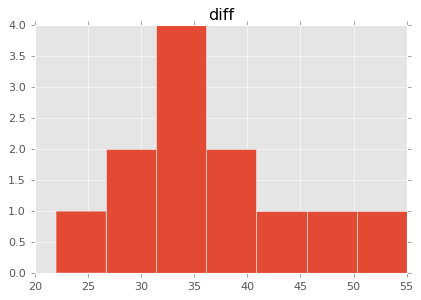

In [27]:
data.hist('diff', bins=7);

In [35]:
n = data['diff'].size
y = data['diff'].mean()
s = data['diff'].std()

se = s / math.sqrt(n)
df = n - 1
t = stats.t.ppf(0.95, df=df)

print("n: {}, y: {}, s: {}".format(n, y, s))

print(template.format(se, df, t, "na"))

(y - t * se, y, y + t * se)

n: 12, y: 36.833333333333336, s: 8.663752423783015

se: 2.501009897031698
df: 11
t: 1.7958848187036691
P-value: na



(32.34180762782648, 36.833333333333336, 41.32485903884019)

## 25.17

### Answers

* two-sample t-test -- not paired data
* (1.6295823781073686, 7.333333333333332, 13.037084288559296)

In [38]:
#!cat ../data/Push-ups_1.txt
data = pd.read_table("../data/Push-ups_1.txt")
data.head()

,Boys,Girls
0,17,24
1,27,7
2,31,14
3,17,16
4,25,2


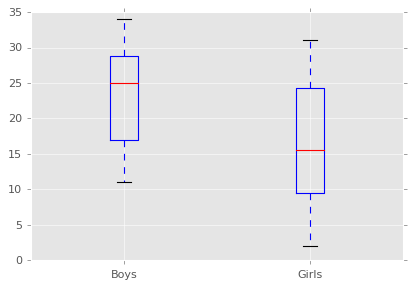

In [46]:
plt.boxplot([data.Boys, data.Girls], labels=["Boys", "Girls"]);

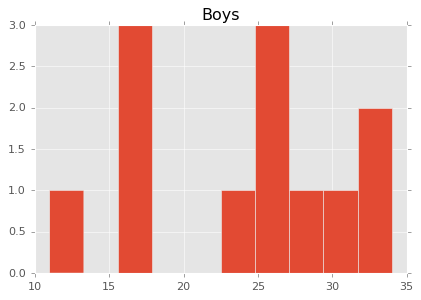

In [47]:
data.hist("Boys");

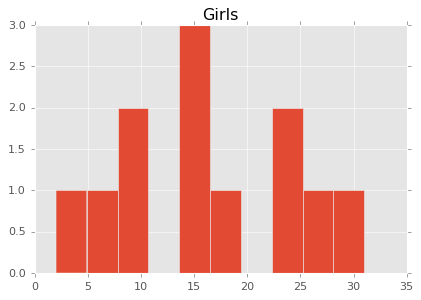

In [49]:
data.hist("Girls");

In [53]:
nb = data.Boys.size
yb = data.Boys.mean()
sb = data.Boys.std()

ng = data.Girls.size
yg = data.Girls.mean()
sg = data.Girls.std()

diff = yb - yg
se = math.sqrt(sb ** 2 / nb + sg ** 2 / ng)
df = degrees_freedom(sb, nb, sg, ng)

t = stats.t.ppf(0.95, df=df)

(diff - se * t, diff, diff + se * t)

(1.6295823781073686, 7.333333333333332, 13.037084288559296)

## 25.19

### Answers

* a) paired t-test: 
    - paired samples
    - groups (i.e. workers) are independent
    - randomly selected
    - "approximately" normal
* b) 
    - H0: mu(diff) = 0
    - HA: mu(diff) > 0
    - given P-value = 0.003, reject H0 - evidence support claim of positive difference
* c) Type I
* d) todo

In [66]:
#!cat ../data/Job_satisfaction.txt
data = pd.read_table("../data/Job_satisfaction.txt", index_col="Worker")
data['diff'] = data.After - data.Before
data.head()

,Before,After,diff
Worker,,,
1,34,33,-1
2,28,36,8
3,29,50,21
4,45,41,-4
5,26,37,11


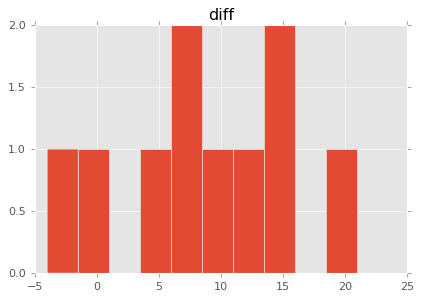

In [68]:
data.hist('diff');

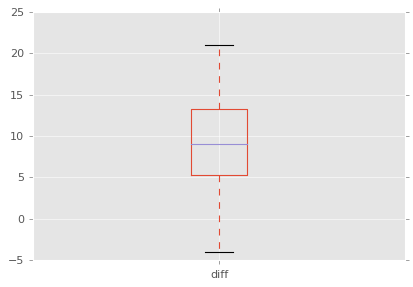

In [69]:
data.boxplot('diff');

In [13]:
n = data['diff'].size
y = data['diff'].mean()
s = data['diff'].std()

print("avg diff: {}".format(y))

se = s / math.sqrt(n)
t = y / se
df = n - 1
pvalue = 1 - stats.t.cdf(t, df=df)

print(template.format(se, df, t, pvalue))

avg diff: 12.5

se: 9.384464919119354
df: 11
t: 1.3319885691653275
P-value: 0.10490176268627349



## 25.21

### Answers

* assumptions
    - paired: by brand, across flavors
    - brands are independent
    - how were the brands selected -- not sure if this is random, or representative
    - looks to be an outlier; great value shows a really low difference due to the very low Vanilla value; probably bad data?
* high P-value (w/ and w/o outlier) : so fail to reject H0.  evidence doesn't support claim of a difference.

In [19]:
#!cat ../data/Yogurt.txt
data = pd.read_table("../data/Yogurt.txt", index_col="Brand")
data['diff'] = data.Strawberry - data.Vanilla
data

,Strawberry,Vanilla,diff
Brand,,,
America's Choice,210,200,10
Breyer's Lowfat,220,220,0
Columbo,220,180,40
Dannon Light 'n Fit,120,120,0
Dannon Lowfat,210,230,-20
Dannon laCreme,140,140,0
Great Value,180,80,100
La Yogurt,170,160,10
Mountain High,200,170,30


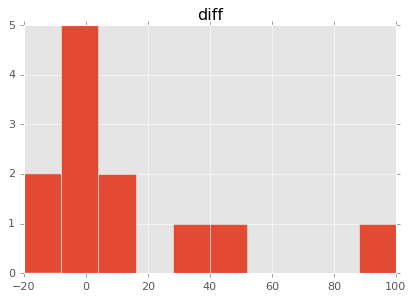

In [20]:
data.hist('diff');

In [21]:
# H0: mu(diff) = 0
# HA: mu(diff) <> 0

n = data['diff'].size
y = data['diff'].mean()
s = data['diff'].std()

print("avg diff: {}".format(y))

se = s / math.sqrt(n)
t = y / se
df = n - 1
pvalue = 2 * (1 - stats.t.cdf(t, df=df))

print(template.format(se, df, t, pvalue))

avg diff: 12.5

se: 9.384464919119354
df: 11
t: 1.3319885691653275
P-value: 0.20980352537254698



In [22]:
## Without outlier
data = data.drop(labels="Great Value")

n = data['diff'].size
y = data['diff'].mean()
s = data['diff'].std()

print("avg diff: {}".format(y))

se = s / math.sqrt(n)
t = y / se
df = n - 1
pvalue = 2* (1 - stats.t.cdf(t, df=df))

print(template.format(se, df, t, pvalue))

avg diff: 4.545454545454546

se: 5.454545454545454
df: 10
t: 0.8333333333333335
P-value: 0.424113662095857



## 25.23

### Answers

* a) (131.78858435484145, 138.7, 145.61141564515853)
    - cars randomly selected?
    - runs are independent
    - appears nearly normal
    - We are 95% confident that the true mean stopping distance on dry pavement is captured by the range 131.8 to 145.6 ft.
* b) (38.78191635566824, 50.7, 62.61808364433177)
    - paired - same car across runs
    - runs are independent
    - appears approx normal
    - concern: several outliers both above and particularly below mean
    - We are 95% confident that the true mean difference in stopping distance between wet and dry pavement is captured by the range 38.8 to 62.6 ft.

In [25]:
#cat ../data/Braking_test2.txt
data = pd.read_table("../data/Braking_test2.txt", index_col="Car")
data['diff'] = data['Wet Pavement'] - data['Dry Pavement']
data

,Dry Pavement,Wet Pavement,diff
Car,,,
1,150,201,51
2,147,220,73
3,136,192,56
4,134,146,12
5,130,182,52
6,134,173,39
7,134,202,68
8,128,180,52
9,136,192,56


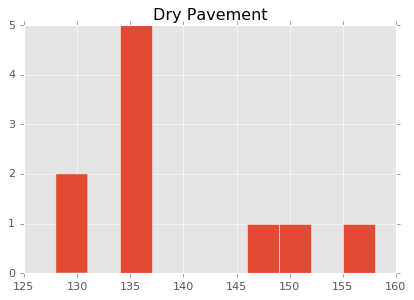

In [29]:
data.hist('Dry Pavement');
# - unimodal
# - slightly right skewed
# - approx. normal

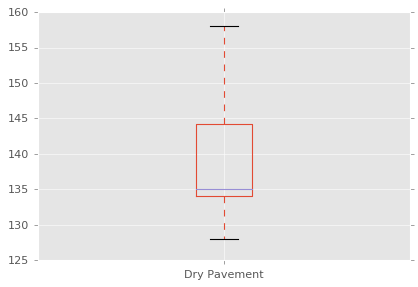

In [33]:
data.boxplot('Dry Pavement');

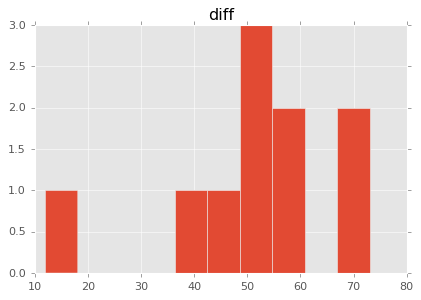

In [31]:
data.hist('diff');
# - unimodal
# - slightly left skewed
# - approx normal

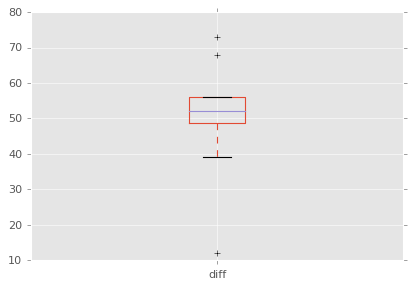

In [35]:
data.boxplot('diff');
# - several outliers both below and above mean

In [27]:
# a
y = data['Dry Pavement'].mean()
s = data['Dry Pavement'].std()
n = data['Dry Pavement'].size

se = s / math.sqrt(n)
df = n - 1
t = stats.t.ppf(0.975, df=df)

(y - t * se, y, y + t * se)

(131.78858435484145, 138.7, 145.61141564515853)

In [32]:
# b
y = data['diff'].mean()
s = data['diff'].std()
n = data['diff'].size

se = s / math.sqrt(n)
df = n - 1
t = stats.t.ppf(0.975, df=df)

(y - t * se, y, y + t * se)

(38.78191635566824, 50.7, 62.61808364433177)

## 25.25

### Answers

* NOTE: the book references 2006 data, but this is 2011 data.  For many of the colleges, the increases are 2X or more during that timeframe, so the results are quite different from what's noted in the key.

* a) (6680.5012728610245, 8701.611111111111, 10722.720949361197)
* b) We are 90% confident that the average difference in tuition between residents and non-residents falls in the range \$6681 to \$10,723 (when excluding the single outlier of UC Irvine).
* c) NA - (per note on data used)

In [43]:
#!cat ../data/Tuition_2011.txt
data = pd.read_table("../data/Tuition_2011.txt", index_col="Institution")
data['diff'] = data['Non-Res'] - data['Resident']
data

,Resident,Non-Res,diff
Institution,,,
Univ of Akron (OH),9545,17468,7923
Athens State (AL),5340,9930,4590
Ball State (IN),8558,22538,13980
Bloomsburg U (PA),8082,17442,9360
UC Irvine (CA),13122,36000,22878
Central State (OH),5672,12648,6976
Clarion U (PA),8828,15068,6240
Dakota State,7621,9336,1715
Fairmont State (WV),5326,11230,5904


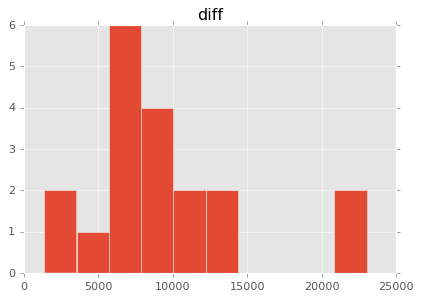

In [45]:
data.hist('diff');

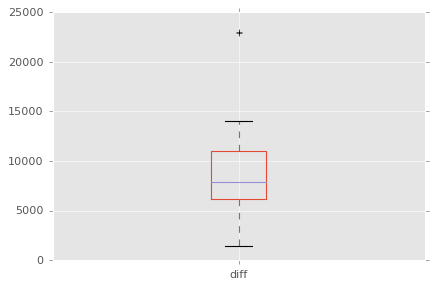

In [46]:
data.boxplot('diff');

In [47]:
# remove UC Irvine -- outlier
data = data.drop("UC Irvine (CA)")

In [48]:
# a
y = data['diff'].mean()
s = data['diff'].std()
n = data['diff'].size

se = s / math.sqrt(n)
df = n - 1
t = stats.t.ppf(0.95, df=df)

(y - t * se, y, y + t * se)

(6680.5012728610245, 8701.611111111111, 10722.720949361197)

## 

### Answers

* 


## 

### Answers

* 


## 

### Answers

* 


## 

### Answers

* 


## 

### Answers

* 
